In [ ]:
! conda install -c anaconda seaborn -y

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::conda==4.6.14=py36_0
  - defaults/linux-64::pyopenssl==18.0.0=py36_0
  - defaults/linux-64::anaconda-project==0.8.2=py36h44fb852_0
  - defaults/linux-64::keyring==18.0.0=py36_0
  - defaults/linux-64::blaze==0.11.3=py36h4e06776_0
  - defaults/linux-64::gevent==1.3.0=py36h14c3975_0
  - defaults/linux-64::numpydoc==0.8.0=py36_0
  - defaults/linux-64::secretstorage==3.1.1=py36_0
  - defaults/linux-64::urllib3==1.22=py36hbe7ace6_0
  - defaults/linux-64::pango==1.42.3=h8589676_0
  - defaults/linux-64::requests==2.18.4=py36he2e5f8d_1
  - defaults/linux-64::anaconda-navigator==1.8.7=py36_0
  - defaults/linux-64::anaconda-client==1.6.14=py36_0
  - defaults/linux-64::sphinx==1.7.4=py36_0
  - defaults/linux-64::cryptography==2.6.1=py36h1ba5d50_0
  - defaults/linux-64::cffi==1.11.5=py36h9745a5d_0
  - defaults/linux-64::conda-

In [59]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# from pyimagesearch import datasets
# from pyimagesearch import models
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import argparse
import locale
import os
import sys
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

# -------------------------
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [67]:
path = './total_836_200622_test.xlsx'
df = pd.read_excel(path)


In [66]:
def homogeneous(row):
    if row['Enhancement'] == 'no-enhancement':
        return 0.25
    elif row['Enhancement'] == 'weak':
        return 0.50
    elif row['Enhancement'] == 'moderate':
        return 0.75
    elif row['Enhancement'] == 'high':
        return 1
    else:
        return 0

## cAverage, cSD없음

In [29]:
#df_filtered = df[[u'시행시나이',u'L/R',u'cT']]
df_filtered = df[[u'시행시나이',u'cT']]
#df_filtered['L/R'] = np.where(df['L/R'] == 'L', 1, 0)
df_filtered['homogeneous'] = df.apply(homogeneous, axis=1)
df_filtered['hetero'] = np.where(df['Enhancement'] == 'hetero', 1, 0)
df_filtered['rim'] = np.where(df['Enhancement'] == 'rim', 1, 0)
df_filtered['clustered'] = np.where(df['Enhancement'] == 'clustered', 1, 0)
df_filtered['non-mass'] = np.where(df['Enhancement'] == 'non-mass', 1, 0)
df_filtered['label'] = df['pN_modify']

df_filtered = df_filtered.rename(columns={u'시행시나이': u'age'})
df_filtered.head()

,age,cT,homogeneous,hetero,rim,clustered,non-mass,label
0,45,22,0.75,0,0,0,0,0
1,58,18,0.75,0,0,0,0,1
2,41,25,0.75,0,0,0,0,1
3,81,15,0.75,0,0,0,0,1
4,46,12,1.00,0,0,0,0,1


In [102]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataset=dataNorm
    return dataset

# df_filtered = df[[u'시행시나이',u'L/R',u'cT']]
df_filtered = df[[u'시행시나이','cT']]
df_filtered['cT'] = normalize(df['cT'])
# df_filtered['L/R'] = np.where(df['L/R'] == 'L', 1, 0)
df_filtered['hu_diff'] = normalize(df['aAverage'] - df['cAverage'])
df_filtered['homogeneous'] = df.apply(homogeneous, axis=1)
df_filtered['hetero'] = np.where(df['Enhancement'] == 'hetero', 1, 0)
df_filtered['rim'] = np.where(df['Enhancement'] == 'rim', 1, 0)
df_filtered['clustered'] = np.where(df['Enhancement'] == 'clustered', 1, 0)
df_filtered['non-mass'] = np.where(df['Enhancement'] == 'non-mass', 1, 0)
df_filtered['label'] = df['pN_modify']

df_filtered = df_filtered.rename(columns={u'시행시나이': u'age'})
df_filtered.head()

,age,cT,hu_diff,homogeneous,hetero,rim,clustered,non-mass,label
0,45,0.2750,0.382430,0.75,0,0,0,0,0
1,58,0.2250,0.338243,0.75,0,0,0,0,1
2,41,0.3125,0.589164,0.75,0,0,0,0,1
3,81,0.1875,0.521305,0.75,0,0,0,0,1
4,46,0.1500,0.000000,1.00,0,0,0,0,1


In [94]:
normalize(df['aAverage'] - df['cAverage'])
# (df_filtered['hu_diff']-df_filtered['hu_diff'].min())/(df_filtered['hu_diff'].max()-df_filtered['hu_diff'].min())

0      0.382430
1      0.338243
2      0.589164
3      0.521305
4      0.000000
5      0.349290
6      0.176749
7      0.401368
8      0.290373
9      0.611257
10     0.457654
11     0.375592
12     0.190426
13     0.278275
14     0.442925
15     0.426092
16     0.561284
17     0.635981
18     0.276696
19     0.294582
20     0.241978
21     0.258811
22     0.471857
23     0.403472
24     0.389795
25     0.419779
26     0.356128
27     0.475539
28     0.294582
29     0.355602
         ...   
249    0.532351
250    0.374014
251    0.361389
252    0.295108
253    0.300894
254    0.583377
255    0.273014
256    0.288795
257    0.448185
258    0.539716
259    0.368227
260    0.285113
261    0.465544
262    0.458706
263    0.570226
264    0.484482
265    0.381378
266    0.215150
267    0.635981
268    0.337191
269    0.553919
270    0.618622
271    0.231457
272    0.347186
273    0.498685
274    0.469227
275    0.120463
276    0.352446
277    0.419253
278    0.290900
Length: 279, dtype: floa

### excel cleaning 완료

In [103]:
properties = list(df_filtered.columns.values)
print(properties)
properties.remove('label')
print(properties)
X = df_filtered[properties]
y = df_filtered['label']
num_input = len(X.columns)

[u'age', u'cT', 'hu_diff', 'homogeneous', 'hetero', 'rim', 'clustered', 'non-mass', 'label']
[u'age', u'cT', 'hu_diff', 'homogeneous', 'hetero', 'rim', 'clustered', 'non-mass']


In [104]:
y_onehot = to_categorical(y)
print(y)
print(y_onehot)

0      0
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
249    1
250    1
251    1
252    0
253    1
254    0
255    1
256    1
257    0
258    1
259    1
260    1
261    0
262    1
263    1
264    1
265    1
266    0
267    1
268    1
269    1
270    0
271    0
272    1
273    1
274    0
275    1
276    1
277    1
278    1
Name: label, Length: 279, dtype: int64
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
# model = keras.Sequential([
#     Dense(6, input_shape=(7,)),
#     Activation('relu'),
#     Dense(12),
#     Activation('relu'),
#     Dense(1),
#     Activation('sigmoid')
# ])

model = Sequential()
model.add(Dense(18, activation='relu', input_dim=num_input))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(4,)),
#     keras.layers.Dense(16, activation=tf.nn.relu),
# 	keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 18)                162       
_________________________________________________________________
dense_26 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 19        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
195/195 [==============================] - 0s 681us/step - loss: 4.0958 - acc: 0.2923
Epoch 2/1000
195/195 [==============================] - 0s 169us/step - loss: 0.7485 - acc: 0.6051
Epoch 3/1000
195/195 [==============================] - 0s 172us/step - loss: 0.6580 - acc: 0.7077
Epoch 4/1000
195/195 [==============================] - 0s 178us/step - loss: 0.6014 - acc: 0.7077
Epoch 5/1000
195/195 [==============================] - 0s 187us/step - loss: 0.6099 - acc: 0.7077
Epoch 6/1000
195/195 [==============================] - 0s 186us/step - loss: 0.6059 - acc: 0.7077
Epoch 7/1000
195/195 [==============================] - 0s 183us/step - loss: 0.6079 - acc: 0.7077
Epoch 8/1000
195/195 [==============================] - 0s 185us/step - loss: 0.6030 - acc: 0.7077
Epoch 9/1000
195/195 [==============================] - 0s 190us/step - loss: 0.6029 - acc: 0.7077
Epoch 10/1000
195/195 [==============================] - 0s 187us/step - loss: 0.6003 - acc: 0.7077
Epoch 11/

Text(0.5,0,'epoch')

Text(0,0.5,'loss')

Text(0,0.5,'accuray')

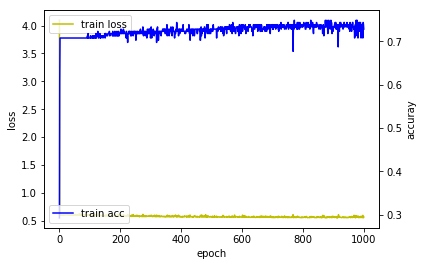

In [107]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

hist = model.fit(X_train, y_train, epochs=1000, batch_size=10, callbacks=[tb_hist])
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [108]:

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test acuracy: ', test_acc)

84/84 [==============================] - 0s 1ms/step
('Test acuracy: ', 0.69047618479955764)


In [123]:
!pwd

/home/miruware/JupyterNotebook/Work


In [142]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (198, 7)
훈련 샘플 레이블의 크기 : (198,)
테스트 샘플 본문의 크기 : (86, 7)
테스트 샘플 레이블의 크기 : (86,)


# ==========================================================================================

### 분포확인

In [236]:
print(df_filtered.isnull().sum())
df_0 = df_filtered[df_filtered['label'] == 0]
count_0 = df_0['label'].value_counts()
print(count_0)
print(df_0.shape)
df_1 = df_filtered[df_filtered['label'] == 1]
print(df_1.shape)

age            0
cT             0
cAverage       5
aAverage       5
homogeneous    0
hetero         0
rim            0
clustered      0
non-mass       0
label          0
dtype: int64
0    85
Name: label, dtype: int64
(85, 10)
(199, 10)


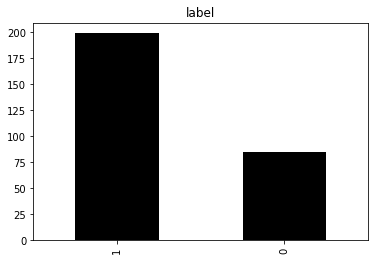

In [240]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].

df_filtered['label'].value_counts().plot(kind='bar', color='black', title='label')
plt.show()

In [233]:
y.value_counts()

1    199
0     85
Name: label, dtype: int64